<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Filtering and Detrending with Pyleoclim

Alexander James Department of Earth Sciences, University of Southern California

Author = {"name": "Alexander James", "affiliation": "Department of Earth Sciences, University of Southern California", "email": "akjames@usc.edu", "orcid": "0000-0001-8561-3188"}

## Preamble

### Goals:

* Become familiar with the various filtering methods and some of their arguments
* Become familiar with the various detrending methods and some of their arguments

**Reading Time:**

10 minutes

### Keywords

Signal Processing; Visualization

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Pandas; Matplotlib

## Data Description

Benthic foraminifera $\delta^{18}O$ data from the [LR04 benthic stack](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004PA001071) stored as `LR04.csv` in the data folder.

## Demonstration

Let's import the packages needed for this tutorial:

In [1]:
import pyleoclim as pyleo
import pandas as pd

### Step 1: Load a Series object from a csv file

To do so, we will first read the data from a csv file and load into a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [2]:
df = pd.read_csv('../data/LR04.csv',skiprows=4)
df

,Time (ka),Benthic d18O (per mil),Standard error (per mil)
0,0.0,3.23,0.03
1,1.0,3.23,0.04
2,2.0,3.18,0.03
3,3.0,3.29,0.03
4,4.0,3.30,0.03
...,...,...,...
2110,5300.0,2.91,0.06
2111,5305.0,2.79,0.04
2112,5310.0,2.79,0.09
2113,5315.0,2.84,0.07


We can then load that dataframe into a pyleoclim.Series object and visualize. For more information on loading data from a csv file into a Series object, see the `loading_to_series.ipynb` tutorial.

In [3]:
ts_d18O = pyleo.Series(time =  df['Time (ka)'], value = df['Benthic d18O (per mil)  '],
                  time_name = 'Age', value_name = 'd18O',
                  time_unit = 'BP ka', value_unit = 'per mil').standardize()       

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Age [BP ka]', ylabel='d18O [per mil]'>)

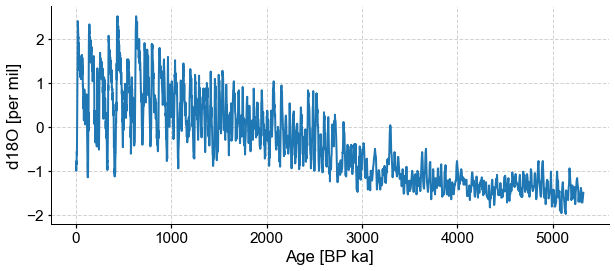

In [4]:
ts_d18O.plot()

### Step 2: Detrending

To detrend the data using `Pyleoclim` we simply call the `.detrend()` method on a `Series` type object. There are several detrending methods which are covered more thoroughly by the [documentation](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.series.Series.detrend).

In this case we'll use the EMD (Empirical Mode Decomposition) method. This decomposes the series into different modes and removes the last one on the assumption that this is the trend in the series.

In [17]:
ts_emd = ts_d18O.detrend(method='savitzky-golay')

/Users/alexanderjames/Documents/GitHub/Pyleoclim_util/pyleoclim/utils/tsutils.py:732: UserWarning: Timeseries is not evenly-spaced, interpolating...
  warnings.warn("Timeseries is not evenly-spaced, interpolating...")


<AxesSubplot:xlabel='Age [BP ka]', ylabel='d18O [per mil]'>

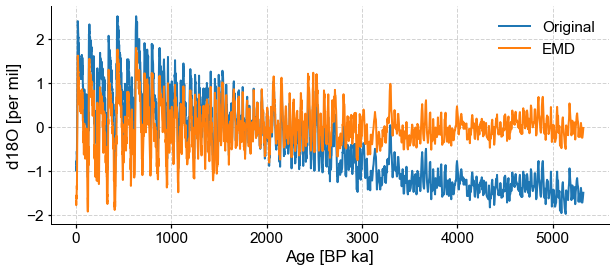

In [18]:
fig, ax = ts_d18O.plot(label='Original')
ts_emd.plot(label='EMD',ax=ax)

We can also pass key word arguments for each of the different methods. These arguments are method dependent. For example, with EMD we can remove more than just the last mode by passing the key word arguement `n` to `.detrend()`.

In [19]:
ts_emd_n = ts_d18O.detrend(n=3)

<AxesSubplot:xlabel='Age [BP ka]', ylabel='d18O [per mil]'>

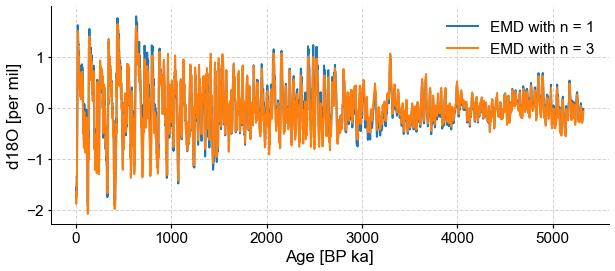

In [20]:
fig, ax = ts_emd.plot(label='EMD with n = 1')
ts_emd_n.plot(label='EMD with n = 3',ax=ax)

As you can see this isn't really necessary for this record, but it does come in handy on occasion and other methods can be more reliant on their key word arguments. Note that these key word arguments are **method dependent**, meaning that you'll need to consult the documentation for each in order to make sure you know which key word arguments can be used with each method.

There are other methods available to us such as `linear`, `savitzky-golay`, and `constant`. Exploring these (and each of their key word arguments) is left as an exercise for the reader.



### Step 3: Filtering

To filter the data using `Pyleoclim` we simply call the `.filter()` method on a `Series` type object. There are several filtering methods which are covered more thoroughly in the [documentation](https://pyleoclim-util.readthedocs.io/en/master/core/api.html?highlight=lipd#pyleoclim.core.series.Series.filter).

Here we'll use the savitzky-golay filter with a `cutoff_scale` of 80 to remove all frequencies with a period of less than 80 kiloyears (we pass the number 80 because our time axis is in units of ka). We have to interpolate the series as the savitzky golay method expects an evenly spaced series. See the notebook `data_imputation.ipynb` for more information on interpolation and other methods to create evenly spaced time series.

In [34]:
ts_sg = ts_d18O.interp().filter(method='savitzky-golay',cutoff_scale=80)

<AxesSubplot:xlabel='Age [BP ka]', ylabel='d18O [per mil]'>

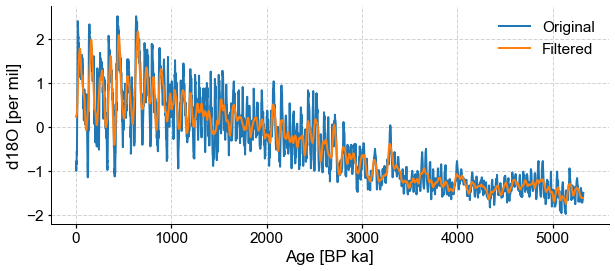

In [35]:
fig, ax = ts_d18O.plot(label='Original')
ts_sg.plot(label='Filtered',ax=ax)

As with `.detrend()`, `.filter()` accepts method specific key word arguments. In the case of the savitzky-golay method, we can pass `window_length` to adjust the size of the filter window. 

In [52]:
ts_sg_win = ts_d18O.interp().filter(method='savitzky-golay',cutoff_scale=80,window_length=81)

<AxesSubplot:xlabel='Age [BP ka]', ylabel='d18O [per mil]'>

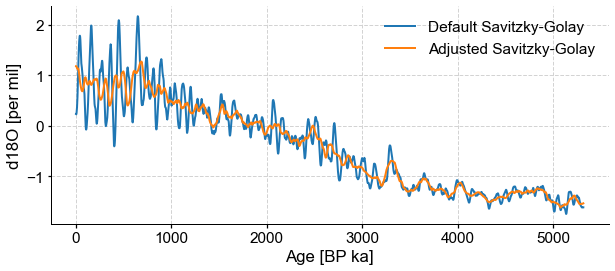

In [53]:
fig, ax = ts_sg.plot(label='Default Savitzky-Golay')
ts_sg_win.plot(label='Adjusted Savitzky-Golay',ax=ax)

Again there are a number of other methods we could use here including: `butterworth`, `lanczos`, and `firwin`. Each has their own key word arguments. Exploring these (and their [documentation](https://pyleoclim-util.readthedocs.io/en/master/core/api.html?highlight=lipd#pyleoclim.core.series.Series.filter)), is left as an exercise for the reader.